# Custom Bird Migration Data Analysis

## Imports

In [4]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib

In [5]:
# Allow the use of custom functions in the utils folder if needed
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath('..'))

## Cleaning the Dataset

### Initializing Dataframe 

In [6]:
# Initialize dataframe to read
df = pd.read_csv('../data/Bird_Migration_Custom_Data.csv')

# Display dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             1301 non-null   int64  
 1    month           1301 non-null   int64  
 2    day             1301 non-null   int64  
 3    latitude        1301 non-null   float64
 4    longitude       1301 non-null   float64
 5    temperature     1301 non-null   int64  
 6    wind_speed      1301 non-null   int64  
 7    wind_direction  1301 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 81.4 KB


### Cleaning the dataset

In [7]:
# Remove leading and trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Remove leading and trailing whitespaces from each cell
for col in df.columns:
    if pd.api.types.is_string_dtype(df[col]):
        df[col] = df[col].str.strip()



# Basic Machine Learning Model Training & Analysis

### Performing a train test split

In [8]:
# Perform a train test split 
#df = df[df['year'] != 2014]
#Initialize features and targets
features = df[['month','temperature', 'day']]
target = df['latitude']

# Initialize Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            1301 non-null   int64  
 1   month           1301 non-null   int64  
 2   day             1301 non-null   int64  
 3   latitude        1301 non-null   float64
 4   longitude       1301 non-null   float64
 5   temperature     1301 non-null   int64  
 6   wind_speed      1301 non-null   int64  
 7   wind_direction  1301 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 81.4 KB


### Initialize Machine Learning Models

In [10]:
# Initilize different bacic machine learning models
model_linear = LinearRegression()
model_rf = RandomForestRegressor()
model_svr = SVR()
model_knn = KNeighborsRegressor(n_neighbors = 2)
model_gb = GradientBoostingRegressor() 
model_dt = DecisionTreeRegressor()

# Train the models
model_linear.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_svr.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_gb.fit(X_train, y_train)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

### Make Predictions and Evaluate Performance

The Mean Squared Error(MSE) measures the average squared difference between the rpedicted values and the actual values. It quantifies how close the predictions are to the actual outcome.
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

The $R^2$ represents the proportion of the variance in the target variable. Mesaures the 'goodness of fit' of the model. 1 Indicates that the model explains 100% of the variance in the target variable. 0 indicates that the models explains none of the variance and the predictions are **as good as the mean of the target variable**. An $R^2$ < 0 indicates that the model performs worse than a simple mean-bsaed prediction.
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$


#### Making predictions on Test Set

In [11]:
# Import methods created in the utils folder
from utils.metrics import evaluate_model

# Make predictions
y_pred_linear = model_linear.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_svr = model_svr.predict(X_test)
y_pred_knn = model_knn.predict(X_test)
y_pred_gb = model_gb.predict(X_test)
y_pred_dt = model_dt.predict(X_test)

#### Evaluating Machine Learning Models

In [12]:
# Evaluate performance
mse_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
mse_svr, r2_svr = evaluate_model(y_test, y_pred_svr)
mse_knn, r2_knn = evaluate_model(y_test, y_pred_knn)
mse_gb, r2_gb = evaluate_model(y_test, y_pred_gb)
mse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)

r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)
r2_svr = r2_score(y_test, y_pred_svr)
r2_knn = r2_score(y_test, y_pred_knn)
r2_gb = r2_score(y_test, y_pred_gb)
r2_dt = r2_score(y_test, y_pred_dt)

# Print the results
print("Linear Regression Performance:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R^2 Score: {r2_linear}")

print("\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R^2 Score: {r2_rf}")

print("\nSupport Vector Regressor Performance:")
print(f"Mean Squared Error: {mse_svr}")
print(f"R^2 Score: {r2_svr}")

print("\nK-Nearest Neighbors Regressor Performance:")
print(f"Mean Squared Error: {mse_knn}")
print(f"R^2 Score: {r2_knn}")

print("\nGradient Boosting Regressor Performance:")
print(f"Mean Squared Error: {mse_gb}")
print(f"R^2 Score: {r2_gb}")

print("\nDecision Tree Regressor Performance:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R^2 Score: {r2_dt}")

Linear Regression Performance:
Mean Squared Error: 258.568849237112
R^2 Score: 0.5338752222750194

Random Forest Regressor Performance:
Mean Squared Error: 65.41166535571965
R^2 Score: 0.8820817044879378

Support Vector Regressor Performance:
Mean Squared Error: 187.612820926805
R^2 Score: 0.6617883990632238

K-Nearest Neighbors Regressor Performance:
Mean Squared Error: 97.184458908046
R^2 Score: 0.824804556154038

Gradient Boosting Regressor Performance:
Mean Squared Error: 57.52779588782266
R^2 Score: 0.8962940387044479

Decision Tree Regressor Performance:
Mean Squared Error: 103.05584021126012
R^2 Score: 0.8142201554693693


#### Making Predictions

Predictions need to be based on the number of features. This means that if you have 5 features that were used to train the model, you need 5 inputs to make a prediction

In [13]:
# Example of individual user input
user_input_month = 7
user_input_temp = 25
user_input_day = 4

# Combine indiividual user input to same format as what was trained
user_input = [[user_input_month,user_input_temp,user_input_day]]

# Make predictions with each model
y_pred_linear_new = model_linear.predict(user_input)
y_pred_rf_new = model_rf.predict(user_input)
y_pred_svr_new = model_svr.predict(user_input)
y_pred_knn_new = model_knn.predict(user_input)
y_pred_gb_new = model_gb.predict(user_input)
y_pred_dt_new = model_dt.predict(user_input)

# Output predictions
print("Prediction using Linear Regression:")
print(y_pred_linear_new)

print("\nPrediction using Random Forest Regressor:")
print(y_pred_rf_new)

print("\nPrediction using Support Vector Regressor:")
print(y_pred_svr_new)

print("\nPrediction using K-Nearest Neighbors Regressor:")
print(y_pred_knn_new)

print("\nPrediction using Gradient Boosting Regressor:")
print(y_pred_gb_new)

print("\nPrediction using Decision Tree Regressor:")
print(y_pred_dt_new)


Prediction using Linear Regression:
[11.17120243]

Prediction using Random Forest Regressor:
[30.118575]

Prediction using Support Vector Regressor:
[12.74882138]

Prediction using K-Nearest Neighbors Regressor:
[21.245]

Prediction using Gradient Boosting Regressor:
[33.86413787]

Prediction using Decision Tree Regressor:
[20.23]


/Users/homefolder/Desktop/Bird Tracking Web App/Machine-Learning-Caribou-Migration/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/homefolder/Desktop/Bird Tracking Web App/Machine-Learning-Caribou-Migration/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/homefolder/Desktop/Bird Tracking Web App/Machine-Learning-Caribou-Migration/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/homefolder/Desktop/Bird Tracking Web App/Machine-Learning-Caribou-Migration/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature name

#### Saving the Model

In [14]:
# Save the each specific machine larning model
# Linear Regression
joblib_file = '../models/Linear_Model.h5'
joblib.dump(model_linear, joblib_file)

# Random Forest Regressor
joblib_file = '../models/RF_Model.h5'
joblib.dump(model_rf, joblib_file)

# Support Vector Regressor
joblib_file = '../models/SVR_Model.h5'
joblib.dump(model_svr, joblib_file)

# K-Nearest Neighbors Regressor
joblib_file = '../models/KNN_Model.h5'
joblib.dump(model_knn, joblib_file)

# Gradient Boosting Regressor
joblib_file = '../models/GB_Model.h5'
joblib.dump(model_gb, joblib_file)

# Decision Tree Regressor
joblib_file = '../models/DT_Model.h5'
joblib.dump(model_dt, joblib_file)

['../models/DT_Model.h5']

#### Graphs

##### Model Predictions vs. Actual Values

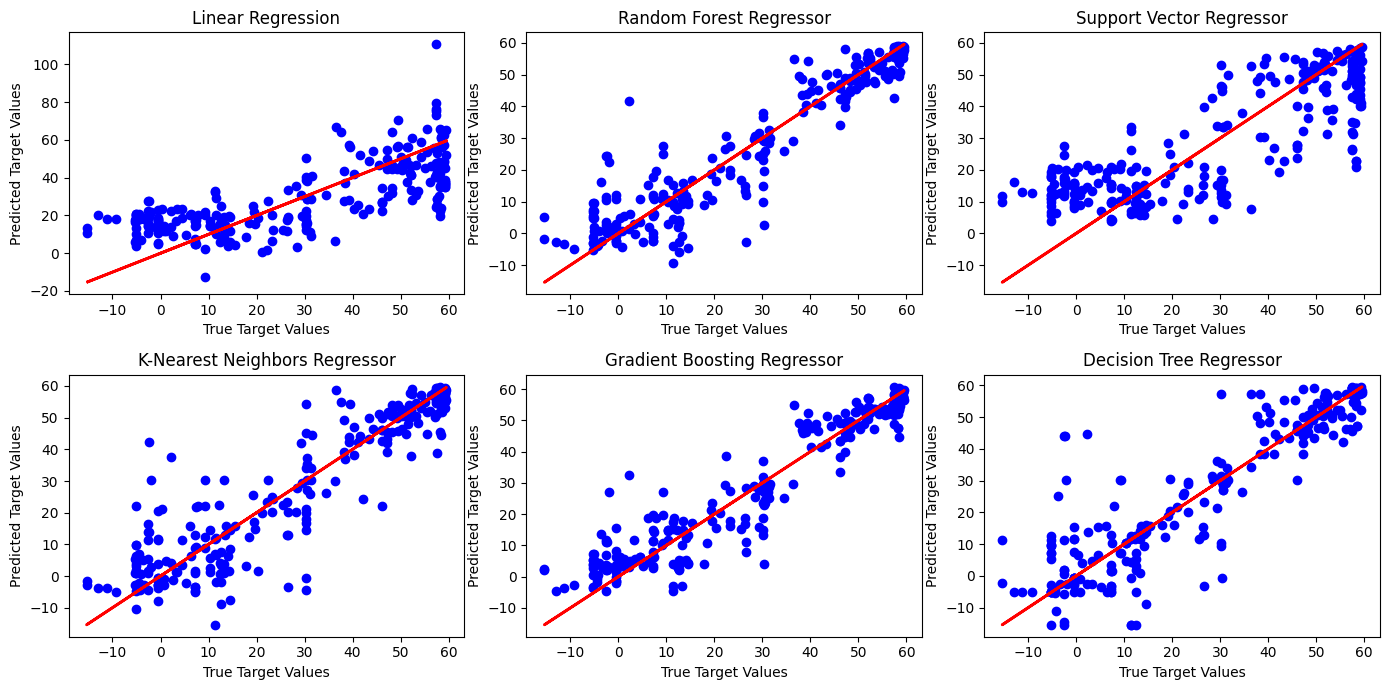

In [15]:
# Plot predictions vs. actual values
plt.figure(figsize=(14, 7))

# Linear Regression
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Linear Regression')

# Random Forest Regressor
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Random Forest Regressor')

# Support Vector Regressor
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_svr, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Support Vector Regressor')

# K-Nearest Neighbors Regressor
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('K-Nearest Neighbors Regressor')

# Gradient Boosting Regressor
plt.subplot(2, 3, 5)
plt.scatter(y_test, y_pred_gb, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Gradient Boosting Regressor')

# Decision Tree Regressor
plt.subplot(2, 3, 6)
plt.scatter(y_test, y_pred_dt, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Decision Tree Regressor')

plt.tight_layout()
plt.show()


##### Learning Curves

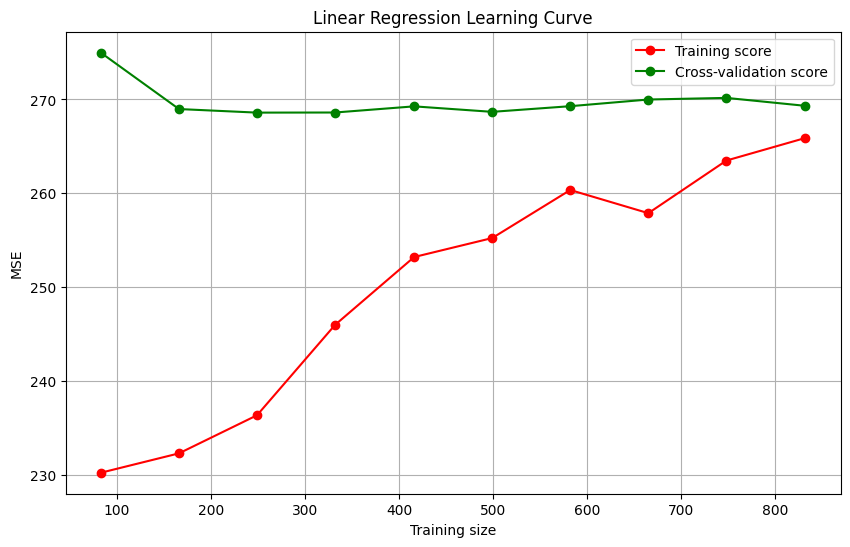

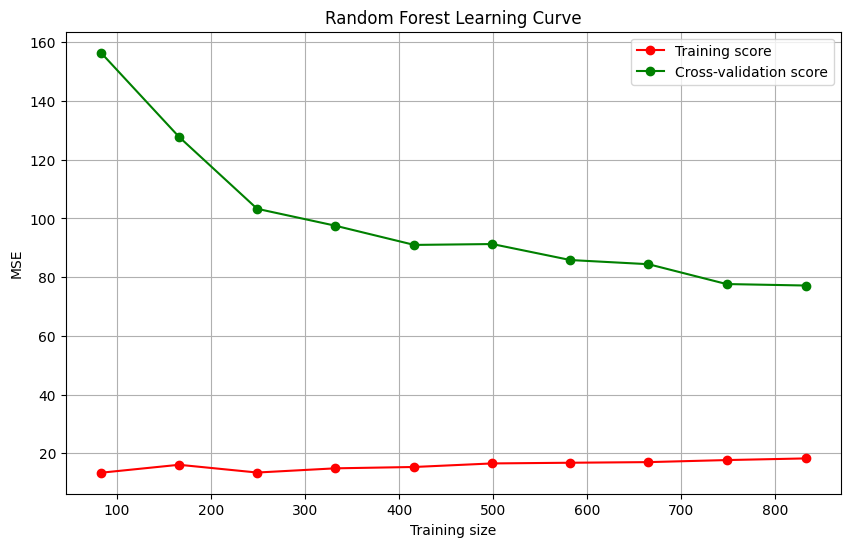

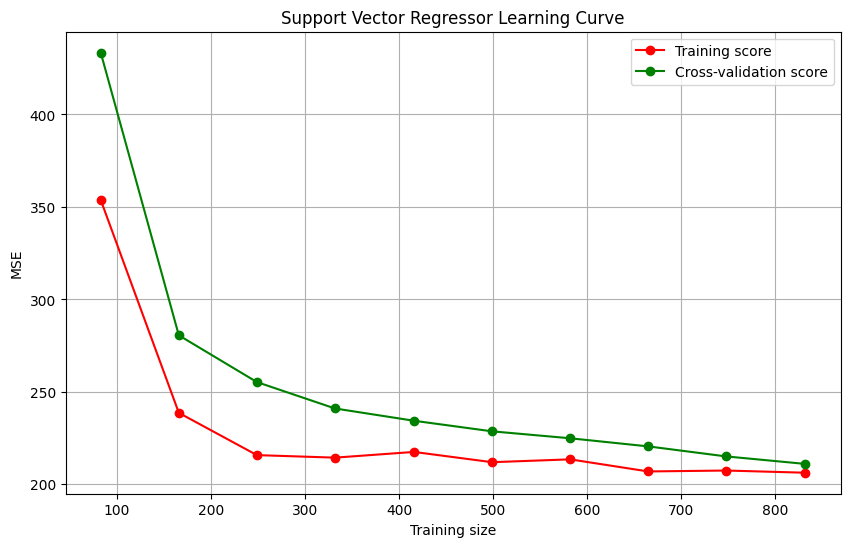

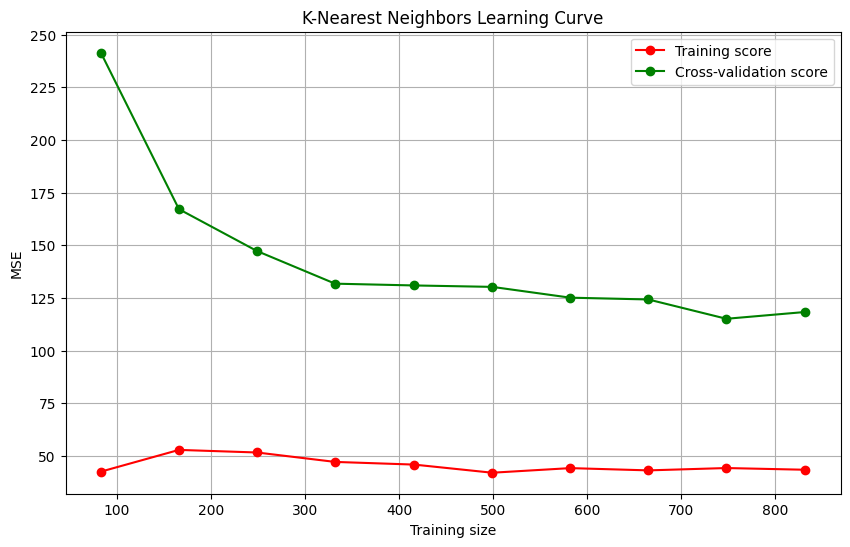

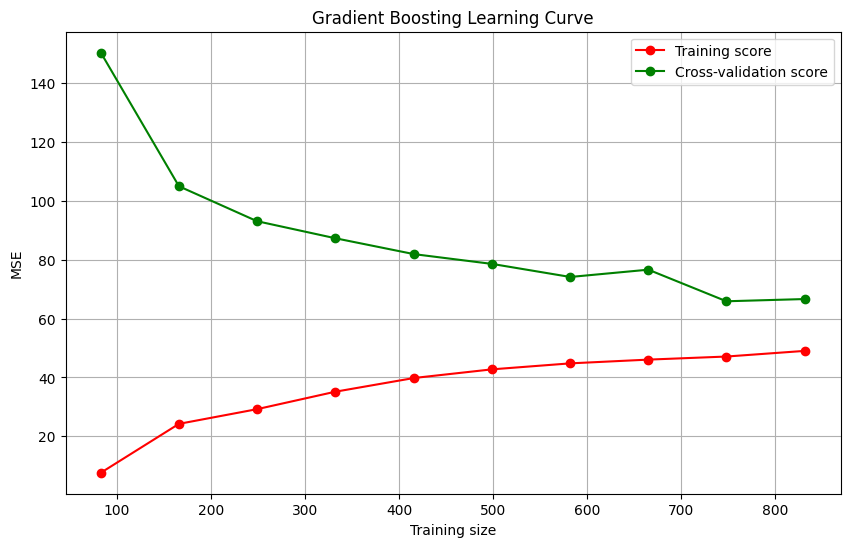

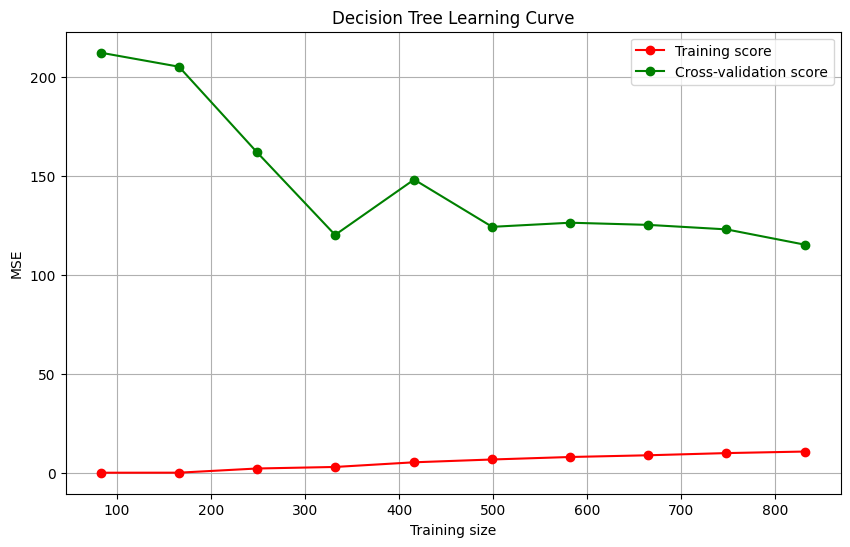

In [16]:
from utils.plot_learning_curve import plot_learning_curve

# Plot learning curves for each model
plot_learning_curve(model_linear, X_train, y_train, title="Linear Regression Learning Curve")
plot_learning_curve(model_rf, X_train, y_train, title="Random Forest Learning Curve")
plot_learning_curve(model_svr, X_train, y_train, title="Support Vector Regressor Learning Curve")
plot_learning_curve(model_knn, X_train, y_train, title="K-Nearest Neighbors Learning Curve")
plot_learning_curve(model_gb, X_train, y_train, title="Gradient Boosting Learning Curve")
plot_learning_curve(model_dt, X_train, y_train, title="Decision Tree Learning Curve")


##### Pair Plots for all Columns

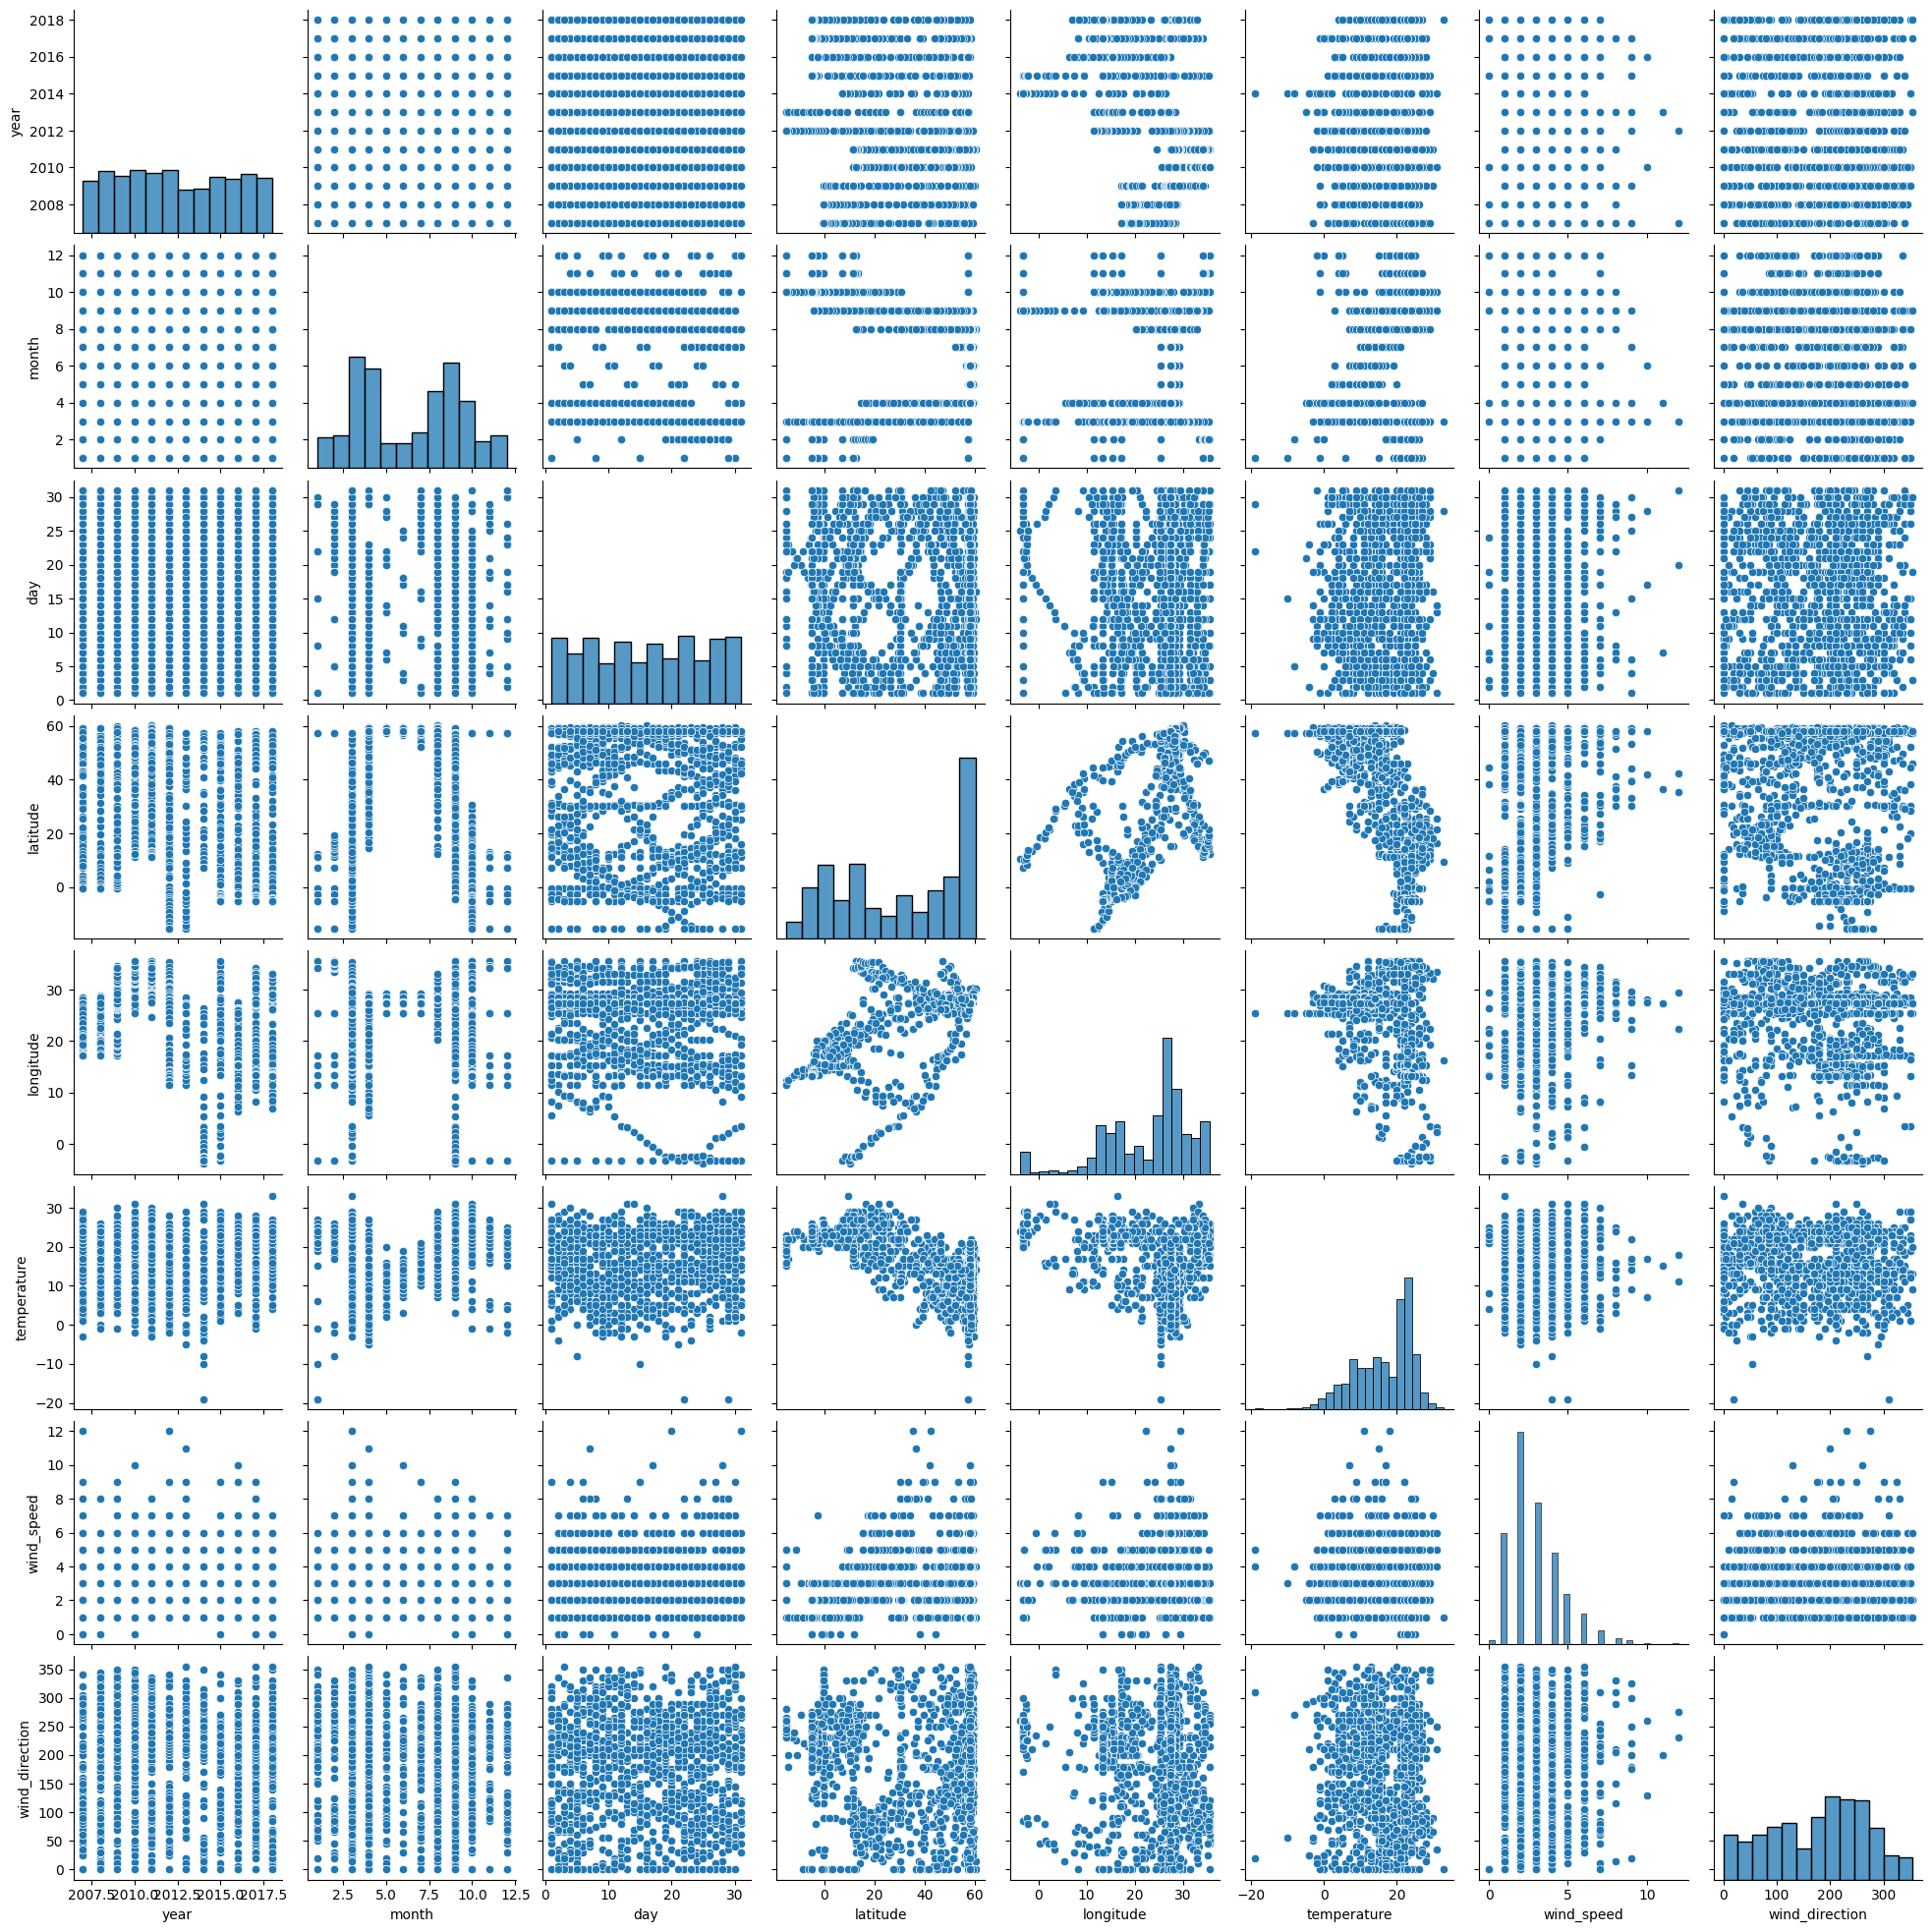

In [17]:
# Use seaborn to show the relationhsip of every column and visulize it
sns.pairplot(df)
plt.show()

##### Correlaion Matrix

Helps identify **Linear relationships** between variables

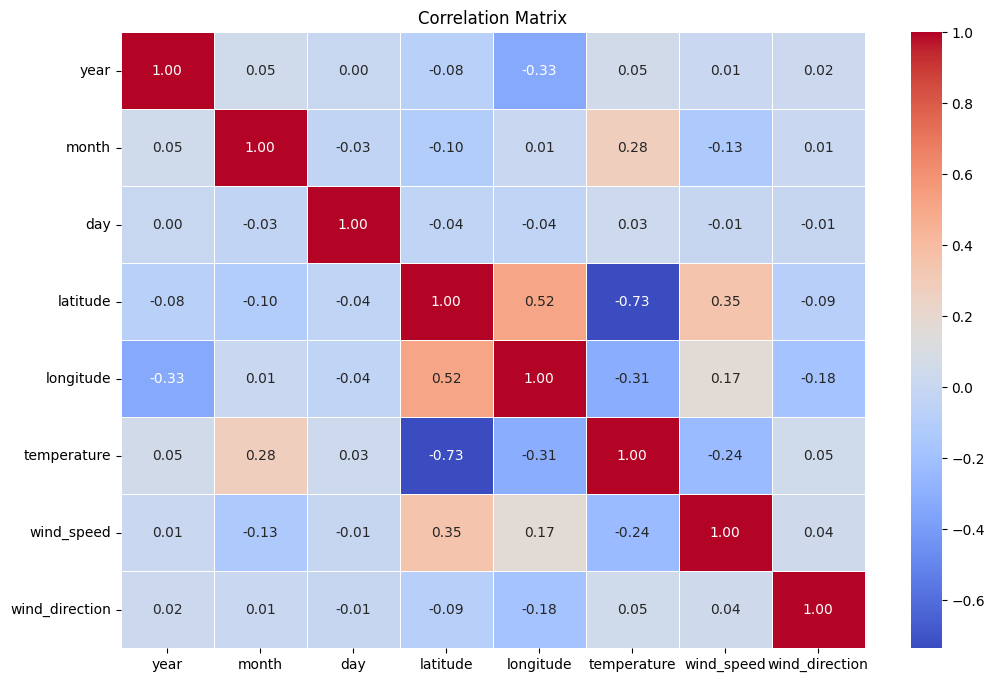

In [18]:
# Need to first make sure that all datatypes of the dataframe are numerical
# You can do this by only chossing the numerical columns OR using a labelencoder and convert the object datatypes to numerical

# Select only the numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Deep Learning Models

## Initialize new target and features for Deep Learning

In [19]:
# Initialize features and targets
features = df[['month', 'temperature', 'wind_speed']]
targets = df[['latitude']]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Standardize targets (important for deep learning)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

## Build the Deep Learning Model - Sequential Model

In [20]:
# Initialize the model
model = Sequential()

# Add layers
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer
# model.add(Dropout(0.5)) # Dropout makes the MSE worse
model.add(Dense(64, activation='relu'))  # Hidden layer
# model.add(Dropout(0.5)) # Dropout makes the MSE worse
model.add(Dense(1))  # Output layer (2 outputs for longitude and latitude)

# Compile the model
optimizer = Adam(learning_rate=0.001)  # You can try different values like 0.0001 or 0.01
model.compile(optimizer=optimizer, loss='mean_squared_error')

/Users/homefolder/Desktop/Bird Tracking Web App/Machine-Learning-Caribou-Migration/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Train the Deep Learning Model

In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1)

# With early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5122 - val_loss: 0.2455
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.1732 - val_loss: 0.1965
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1636 - val_loss: 0.1859
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1484 - val_loss: 0.1816
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.1490 - val_loss: 0.1883
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.1350 - val_loss: 0.1753
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.1310 - val_loss: 0.1796
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.1236 - val_loss: 0.2023
Epoch 9/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.1322 - val_loss: 0.1650
Epoch 10/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.1284 - val_loss: 0.1724
Epoch 11/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 0.1308 - val_loss: 0.1628
Epoch 12/100
104/104 ━━━━

## Evaluate the Performance of the Model

In [22]:
# This cell is for having 2 outputs in the prediction
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Loss on test data: {loss:.4f}')

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and true values
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)

# Calculate metrics
mae_longitude = mean_absolute_error(y_test_inv[:, 0], y_pred_inv[:, 0])
mae_latitude = mean_absolute_error(y_test_inv[:, 1], y_pred_inv[:, 1])
mse_longitude = mean_squared_error(y_test_inv[:, 0], y_pred_inv[:, 0])
mse_latitude = mean_squared_error(y_test_inv[:, 1], y_pred_inv[:, 1])
rmse_longitude = np.sqrt(mse_longitude)
rmse_latitude = np.sqrt(mse_latitude)
r2_longitude = r2_score(y_test_inv[:, 0], y_pred_inv[:, 0])
r2_latitude = r2_score(y_test_inv[:, 1], y_pred_inv[:, 1])

print(f'Mean Absolute Error for Longitude: {mae_longitude:.2f}')
print(f'Mean Absolute Error for Latitude: {mae_latitude:.2f}')
print(f'Mean Squared Error for Longitude: {mse_longitude:.2f}')
print(f'Mean Squared Error for Latitude: {mse_latitude:.2f}')
print(f'Root Mean Squared Error for Longitude: {rmse_longitude:.2f}')
print(f'Root Mean Squared Error for Latitude: {rmse_latitude:.2f}')
print(f'R-squared for Longitude: {r2_longitude:.2f}')
print(f'R-squared for Latitude: {r2_latitude:.2f}')


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.1007
Loss on test data: 0.1015
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


IndexError: index 1 is out of bounds for axis 1 with size 1

In [23]:
# This cell is for having 1 output in the prediction
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Loss on test data: {loss:.4f}')

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and true values
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)

# Calculate metrics
mae_latitude = mean_absolute_error(y_test_inv, y_pred_inv)
mse_latitude = mean_squared_error(y_test_inv, y_pred_inv)
rmse_latitude = np.sqrt(mse_latitude)
r2_latitude = r2_score(y_test_inv, y_pred_inv)

print(f'Mean Absolute Error for Latitude: {mae_latitude:.2f}')
print(f'Mean Squared Error for Latitude: {mse_latitude:.2f}')
print(f'Root Mean Squared Error for Latitude: {rmse_latitude:.2f}')
print(f'R-squared for Latitude: {r2_latitude:.2f}')


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 0.1007
Loss on test data: 0.1015
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
Mean Absolute Error for Latitude: 5.89
Mean Squared Error for Latitude: 60.55
Root Mean Squared Error for Latitude: 7.78
R-squared for Latitude: 0.89


## Saving the Model

In [24]:
# Save the model
model.save('../models/NN_3features_predict_lat.h5')

In [25]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
parameter = 'longitude'
Q1 = df[parameter].quantile(0.25)
Q3 = df[parameter].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['temperature'] < lower_bound) | (df['temperature'] > upper_bound)]

print("Outliers:")
print(outliers)

Outliers:
      year  month  day  latitude  longitude  temperature  wind_speed  \
38    2007      4    9     59.20      27.47           -3           2   
148   2008      4   19     59.11      27.55            0           3   
149   2008      4   22     59.11      27.55           -1           1   
267   2009      4   22     58.49      27.52           -1           2   
363   2010      3   23     36.50      30.80            0           1   
378   2010      4    7     56.16      27.56            0           2   
379   2010      4    8     57.48      28.20           -2           2   
498   2011      4   11     57.50      28.50           -2           1   
499   2011      4   12     58.43      28.90           -3           2   
500   2011      4   13     59.19      28.25           -1           1   
501   2011      4   14     59.56      29.22           -3           4   
613   2012      4    9     49.54      28.47           -1           4   
614   2012      4   10     50.26      28.49           

# Reoboflow API Test

In [26]:
from inference_sdk import InferenceHTTPClient


In [27]:
# Initialize the Roboflow client
CLIENT = InferenceHTTPClient(
    api_url="https://classify.roboflow.com",
    api_key="Kn5Q5bgVfMIFcPUy0znL"  # Replace with your actual API key
)

# Path to your image
image_path = "your_image.jpg"  # Replace with the actual path to your image

# The model ID for inference
model_id = "bird-species-detector/851"  # Replace with your actual model ID

# Perform inference on the image
result = CLIENT.infer(image_path, model_id=model_id)

# Output the result
print("Inference Result:", result)

EncodingError: Could not encode bytes to OpenCV image.